## [chatbot]
- 참조: https://python.langchain.com/v0.2/docs/tutorials/chatbot/ 	

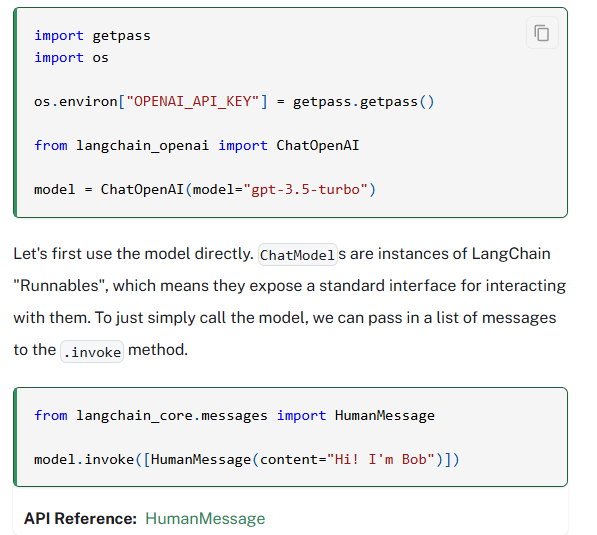

### [퀵스타트]


In [2]:
from langchain_openai import ChatOpenAI
from langchain_core.messages import HumanMessage
from langchain_core.messages import AIMessage

# import getpass
# import os

# os.environ['OPENAI_API_KEY'] = getpass.getpass()
from dotenv import load_dotenv
load_dotenv()

True

In [3]:
model = ChatOpenAI(model='gpt-3.5-turbo')

In [4]:
answer = model.invoke([HumanMessage(content="Hi. I'm Solana..!")])
answer.content

'Hello Solana! How can I assist you today?'

In [5]:
answer02 = model.invoke('내 이름이 뭐니?')
answer02

AIMessage(content='죄위의 개인정보 보호를 위해 이름을 알려주시겠어요?', additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 27, 'prompt_tokens': 14, 'total_tokens': 41, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-3.5-turbo-0125', 'system_fingerprint': None, 'id': 'chatcmpl-Bcmw5B9g03ERUbDG0DbLNaiZ1dlJS', 'finish_reason': 'stop', 'logprobs': None}, id='run--5a69bac2-0233-4106-b5a0-36eeb94244c9-0', usage_metadata={'input_tokens': 14, 'output_tokens': 27, 'total_tokens': 41, 'input_token_details': {'audio': 0, 'cache_read': 0}, 'output_token_details': {'audio': 0, 'reasoning': 0}})

In [6]:
answer03 = model.invoke(
    [
        HumanMessage(content='Hi~ I am Solana~'),
		AIMessage(content='Hello Bob! How can I assist you today? '),
        HumanMessage(content='Nothing!'),

	]
)

answer03

AIMessage(content='Great to hear! Let me know if you ever need assistance in the future. Have a wonderful day!', additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 21, 'prompt_tokens': 35, 'total_tokens': 56, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-3.5-turbo-0125', 'system_fingerprint': None, 'id': 'chatcmpl-Bcmw6LkKNwMJBx2SsG0nv5FuGrHHW', 'finish_reason': 'stop', 'logprobs': None}, id='run--afc206d4-6ced-4b14-930e-deadcb64a4e2-0', usage_metadata={'input_tokens': 35, 'output_tokens': 21, 'total_tokens': 56, 'input_token_details': {'audio': 0, 'cache_read': 0}, 'output_token_details': {'audio': 0, 'reasoning': 0}})

### [Message History]
![alt text](image.png)

In [7]:
from langchain_core.chat_history import(
    BaseChatMessageHistory,
    InMemoryChatMessageHistory
)

from langchain_core.runnables.history import RunnableWithMessageHistory

store = {}

def get_session_history(session_id:str) -> BaseChatMessageHistory:
	if session_id not in store:
		store[session_id] = InMemoryChatMessageHistory()	
    
	return store[session_id]


In [8]:
with_message_history = RunnableWithMessageHistory(
    model, 
    get_session_history
    )

config = {'configurable':{'session_id':'abc1'}}

resopnse = with_message_history.invoke(
    [HumanMessage(content='Hi! I am Solana')],
	config=config,
)

resopnse

AIMessage(content='Hi Solana! Nice to meet you. How can I assist you today?', additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 16, 'prompt_tokens': 13, 'total_tokens': 29, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-3.5-turbo-0125', 'system_fingerprint': None, 'id': 'chatcmpl-Bcmw7kPgIMc25sqzR1eBLH4K6IaXZ', 'finish_reason': 'stop', 'logprobs': None}, id='run--428f31c8-feb9-4207-a2af-2af80d8f3e32-0', usage_metadata={'input_tokens': 13, 'output_tokens': 16, 'total_tokens': 29, 'input_token_details': {'audio': 0, 'cache_read': 0}, 'output_token_details': {'audio': 0, 'reasoning': 0}})

In [9]:
resopnse.content

'Hi Solana! Nice to meet you. How can I assist you today?'

In [10]:
resopnse = with_message_history.invoke(
    [HumanMessage(content='What is my name?')],
	config=config,
)

resopnse.content

'Your name is Solana.'

#### <문제> 대화이력(message history)에서 첫번째 질문(HumanMessage)출력

In [11]:
# 대화이력
get_session_history('abc1')

InMemoryChatMessageHistory(messages=[HumanMessage(content='Hi! I am Solana', additional_kwargs={}, response_metadata={}), AIMessage(content='Hi Solana! Nice to meet you. How can I assist you today?', additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 16, 'prompt_tokens': 13, 'total_tokens': 29, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-3.5-turbo-0125', 'system_fingerprint': None, 'id': 'chatcmpl-Bcmw7kPgIMc25sqzR1eBLH4K6IaXZ', 'finish_reason': 'stop', 'logprobs': None}, id='run--428f31c8-feb9-4207-a2af-2af80d8f3e32-0', usage_metadata={'input_tokens': 13, 'output_tokens': 16, 'total_tokens': 29, 'input_token_details': {'audio': 0, 'cache_read': 0}, 'output_token_details': {'audio': 0, 'reasoning': 0}}), HumanMessage(content='What is my name?', additional_kwargs={}, 

In [12]:
# 첫번째 질문(HumanMessage) 출력

get_session_history('abc1').messages[0]

HumanMessage(content='Hi! I am Solana', additional_kwargs={}, response_metadata={})

In [13]:
# 첫번째 질문(HumanMessage)에서 내용만 출력

get_session_history('abc1').messages[0].content

'Hi! I am Solana'

In [14]:
# 새로운 id 대화 생성
config = {"configurable":{"session_id":"1004"}}

resopnse = with_message_history.invoke(
    [HumanMessage(content='what is my name?')],
    config=config
    )

resopnse.content

"I'm sorry, I am an AI digital assistant and I do not have the ability to know your name unless you tell me."

In [15]:
len(store)

2

In [16]:
store.keys()

dict_keys(['abc1', '1004'])

In [17]:
get_session_history('1004')

InMemoryChatMessageHistory(messages=[HumanMessage(content='what is my name?', additional_kwargs={}, response_metadata={}), AIMessage(content="I'm sorry, I am an AI digital assistant and I do not have the ability to know your name unless you tell me.", additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 26, 'prompt_tokens': 12, 'total_tokens': 38, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-3.5-turbo-0125', 'system_fingerprint': None, 'id': 'chatcmpl-Bcmw93WkuLN8nBObGAEacyqi1j7X1', 'finish_reason': 'stop', 'logprobs': None}, id='run--1636b7cf-4902-4975-acea-b6b34e427a5b-0', usage_metadata={'input_tokens': 12, 'output_tokens': 26, 'total_tokens': 38, 'input_token_details': {'audio': 0, 'cache_read': 0}, 'output_token_details': {'audio': 0, 'reasoning': 0}})])

In [18]:
# 질문(HumanMessage) 답변(AIMessage) 히스토리 내용만 출력
for message in get_session_history('1004').messages:
    print(message.type.upper(), message.content)
    

HUMAN what is my name?
AI I'm sorry, I am an AI digital assistant and I do not have the ability to know your name unless you tell me.


### [Prompt templates] - MessagePlaceholder

In [19]:
from langchain_core.prompts import ChatPromptTemplate, MessagesPlaceholder

prompt = ChatPromptTemplate.from_messages(
    [('system','you are a helpful assistant. Answer all questions to the best of your ability.'),
    MessagesPlaceholder('messages'),]   #원래 이 곳엔 history가 와야함
)

chain = prompt | model
chain

ChatPromptTemplate(input_variables=['messages'], input_types={'messages': list[typing.Annotated[typing.Union[typing.Annotated[langchain_core.messages.ai.AIMessage, Tag(tag='ai')], typing.Annotated[langchain_core.messages.human.HumanMessage, Tag(tag='human')], typing.Annotated[langchain_core.messages.chat.ChatMessage, Tag(tag='chat')], typing.Annotated[langchain_core.messages.system.SystemMessage, Tag(tag='system')], typing.Annotated[langchain_core.messages.function.FunctionMessage, Tag(tag='function')], typing.Annotated[langchain_core.messages.tool.ToolMessage, Tag(tag='tool')], typing.Annotated[langchain_core.messages.ai.AIMessageChunk, Tag(tag='AIMessageChunk')], typing.Annotated[langchain_core.messages.human.HumanMessageChunk, Tag(tag='HumanMessageChunk')], typing.Annotated[langchain_core.messages.chat.ChatMessageChunk, Tag(tag='ChatMessageChunk')], typing.Annotated[langchain_core.messages.system.SystemMessageChunk, Tag(tag='SystemMessageChunk')], typing.Annotated[langchain_core.mes

In [20]:
resopnse = chain.invoke({'messages':[HumanMessage(content='Hi~ I am Rachel')]})
resopnse.content

'Hello Rachel! How can I assist you today?'

In [21]:
len(store)

2

In [22]:
with_message_history = RunnableWithMessageHistory(
    chain, 
    get_session_history
    )

config = {'configurable':{'session_id':'abc5'}}

resopnse = with_message_history.invoke(
    [HumanMessage(content='Hello, I am Rachel.')],
	config=config
)

resopnse.content

'Hello Rachel! How can I assist you today?'

In [23]:
len(store)

3

In [24]:
store.keys()

dict_keys(['abc1', '1004', 'abc5'])

In [25]:
get_session_history('abc5')

InMemoryChatMessageHistory(messages=[HumanMessage(content='Hello, I am Rachel.', additional_kwargs={}, response_metadata={}), AIMessage(content='Hello Rachel! How can I assist you today?', additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 10, 'prompt_tokens': 33, 'total_tokens': 43, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-3.5-turbo-0125', 'system_fingerprint': None, 'id': 'chatcmpl-BcmwAs224AwloTFujjigAqaDwBqk1', 'finish_reason': 'stop', 'logprobs': None}, id='run--b8db16b4-493a-41cf-b568-e7703d290d8d-0', usage_metadata={'input_tokens': 33, 'output_tokens': 10, 'total_tokens': 43, 'input_token_details': {'audio': 0, 'cache_read': 0}, 'output_token_details': {'audio': 0, 'reasoning': 0}})])

In [26]:
for thing in get_session_history('abc5').messages:
    print(thing.type.upper(),thing.content)

HUMAN Hello, I am Rachel.
AI Hello Rachel! How can I assist you today?


프롬프트를 좀 더 복잡하게 만들어보자. 프롬프트 템플릿이 다음과 같다고 가정.

In [27]:
prompt = ChatPromptTemplate.from_messages([
        ("system", "You are a helpful assistant. Answer in the language specified: {language}."),
        MessagesPlaceholder("messages"),
    ])

chain = prompt | model    #ChatPromptTemplate(input_variables=['language', 'messages'], input_types={'messages': list })

chain

ChatPromptTemplate(input_variables=['language', 'messages'], input_types={'messages': list[typing.Annotated[typing.Union[typing.Annotated[langchain_core.messages.ai.AIMessage, Tag(tag='ai')], typing.Annotated[langchain_core.messages.human.HumanMessage, Tag(tag='human')], typing.Annotated[langchain_core.messages.chat.ChatMessage, Tag(tag='chat')], typing.Annotated[langchain_core.messages.system.SystemMessage, Tag(tag='system')], typing.Annotated[langchain_core.messages.function.FunctionMessage, Tag(tag='function')], typing.Annotated[langchain_core.messages.tool.ToolMessage, Tag(tag='tool')], typing.Annotated[langchain_core.messages.ai.AIMessageChunk, Tag(tag='AIMessageChunk')], typing.Annotated[langchain_core.messages.human.HumanMessageChunk, Tag(tag='HumanMessageChunk')], typing.Annotated[langchain_core.messages.chat.ChatMessageChunk, Tag(tag='ChatMessageChunk')], typing.Annotated[langchain_core.messages.system.SystemMessageChunk, Tag(tag='SystemMessageChunk')], typing.Annotated[langch

프롬프트에 새로운 언어 입력 추가 > 체인을 호출하여 원하는 언어를 전달할 수 있음.

In [28]:
resopnse = chain.invoke(
    {"messages": [HumanMessage(content="hi! I'm bob")], "language": "Spanish"}
)

resopnse.content

'¡Hola, Bob! ¿En qué puedo ayudarte hoy?'

이 복잡한 체인을 Message History 클래스로 래핑. (입력에 여러 키가 있으므로 채팅 기록을 저장 시 사용할 올바른 키를 지정해야함)

In [29]:
with_message_history = RunnableWithMessageHistory(
    chain,
    get_session_history,     #저장은 되지만 프롬프트에 넣지 못함 
    # history_messages_key='messages'   ===>원래 이렇게 인풋메시지키는 인풋으로 해줬음  
    input_messages_key='messages'
)

config = {'configurable':{'session_id':'abc11'}}

resopnse = with_message_history.invoke(
    {'messages':[HumanMessage(content='hi, i am Todd')], 'language':'Spanish'},
    config=config
    
)

resopnse.content

'¡Hola, Todd! ¿En qué puedo ayudarte hoy?'

In [30]:
resopnse = with_message_history.invoke(
    {'messages':[HumanMessage(content='What is my name?')], 'language':'French'},
    config=config
)
resopnse.content

'Votre nom est Todd.'

In [31]:
get_session_history('abc11')

InMemoryChatMessageHistory(messages=[HumanMessage(content='hi, i am Todd', additional_kwargs={}, response_metadata={}), AIMessage(content='¡Hola, Todd! ¿En qué puedo ayudarte hoy?', additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 13, 'prompt_tokens': 30, 'total_tokens': 43, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-3.5-turbo-0125', 'system_fingerprint': None, 'id': 'chatcmpl-BcmwCgyinB22XFQBZvfk4QwsIVjbx', 'finish_reason': 'stop', 'logprobs': None}, id='run--929a227f-f431-416e-99c3-478a9b63c806-0', usage_metadata={'input_tokens': 30, 'output_tokens': 13, 'total_tokens': 43, 'input_token_details': {'audio': 0, 'cache_read': 0}, 'output_token_details': {'audio': 0, 'reasoning': 0}}), HumanMessage(content='What is my name?', additional_kwargs={}, response_metadata=

## [Managing Conversation History]

In [32]:
from langchain_core.messages import trim_messages, SystemMessage

trimmer = trim_messages(
    max_tokens=60,
    strategy='last',
    token_counter=model,
    include_system=True,
    allow_partial=False,
    start_on="human",   
)

messages = [
    SystemMessage(content='You are a good psychological counselor.'),
    HumanMessage(content='Hi! I am Ruel'),
    AIMessage(content='Hi'),
    HumanMessage(content="I like chocolate ice cream"),
    AIMessage(content="nice"),
    HumanMessage(content="whats 2 + 2"),
    AIMessage(content="4"),
    HumanMessage(content="thanks"),
    AIMessage(content="no problem!"),
    HumanMessage(content="having fun?"),
    AIMessage(content="yes!"),
]

trim_messages = trimmer.invoke(messages)
trim_messages


[SystemMessage(content='You are a good psychological counselor.', additional_kwargs={}, response_metadata={}),
 HumanMessage(content='whats 2 + 2', additional_kwargs={}, response_metadata={}),
 AIMessage(content='4', additional_kwargs={}, response_metadata={}),
 HumanMessage(content='thanks', additional_kwargs={}, response_metadata={}),
 AIMessage(content='no problem!', additional_kwargs={}, response_metadata={}),
 HumanMessage(content='having fun?', additional_kwargs={}, response_metadata={}),
 AIMessage(content='yes!', additional_kwargs={}, response_metadata={})]

In [33]:
model.get_num_tokens_from_messages(trim_messages)

55

In [ ]:
# # itemgetter라는 녀석의 개념 
# from operator import itemgetter

# dict = {"messages": messages + [HumanMessage(content='what is my name?')], "language":"English"}

# result = itemgetter("messages")
# result(dict)

# 위 두 줄 = itemgetter("messages")(dict) 인스턴스도, 함수도 주소가 있다. 

[SystemMessage(content='You are a good psychological counselor.', additional_kwargs={}, response_metadata={}),
 HumanMessage(content='Hi! I am Ruel', additional_kwargs={}, response_metadata={}),
 AIMessage(content='Hi', additional_kwargs={}, response_metadata={}),
 HumanMessage(content='I like chocolate ice cream', additional_kwargs={}, response_metadata={}),
 AIMessage(content='nice', additional_kwargs={}, response_metadata={}),
 HumanMessage(content='whats 2 + 2', additional_kwargs={}, response_metadata={}),
 AIMessage(content='4', additional_kwargs={}, response_metadata={}),
 HumanMessage(content='thanks', additional_kwargs={}, response_metadata={}),
 AIMessage(content='no problem!', additional_kwargs={}, response_metadata={}),
 HumanMessage(content='having fun?', additional_kwargs={}, response_metadata={}),
 AIMessage(content='yes!', additional_kwargs={}, response_metadata={}),
 HumanMessage(content='what is my name?', additional_kwargs={}, response_metadata={})]

In [ ]:
from operator import itemgetter
from langchain_core.runnables import RunnablePassthrough

# cf) 이전의 chain : chain = prompt | model 

chain = ( 
    RunnablePassthrough.assign(happy=itemgetter('messages') | trimmer)                  #===>assign: message에 itemgetter('message')|trimmer의 값을 할당해줌. 
	  | prompt
    | model 
    )

# assign의 인수 자리에 messages아닌 다른 변수 넣으면 이름을 기억함.(앞 메세지가 잘리지 않아서)

input_data ={'messages': messages + [HumanMessage(content='내 이름이 뭐였니?')], 'language': 'Korean',}

resopnse = chain.invoke(input_data)

resopnse
resopnse.content

'당신의 이름은 Ruel입니다.'

In [60]:
print(input_data)


{'messages': [SystemMessage(content='You are a good psychological counselor.', additional_kwargs={}, response_metadata={}), HumanMessage(content='Hi! I am Ruel', additional_kwargs={}, response_metadata={}), AIMessage(content='Hi', additional_kwargs={}, response_metadata={}), HumanMessage(content='I like chocolate ice cream', additional_kwargs={}, response_metadata={}), AIMessage(content='nice', additional_kwargs={}, response_metadata={}), HumanMessage(content='whats 2 + 2', additional_kwargs={}, response_metadata={}), AIMessage(content='4', additional_kwargs={}, response_metadata={}), HumanMessage(content='thanks', additional_kwargs={}, response_metadata={}), AIMessage(content='no problem!', additional_kwargs={}, response_metadata={}), HumanMessage(content='having fun?', additional_kwargs={}, response_metadata={}), AIMessage(content='yes!', additional_kwargs={}, response_metadata={}), HumanMessage(content='내 이름이 뭐였니?', additional_kwargs={}, response_metadata={})], 'language': 'Korean'}

In [37]:
data_list = list(resopnse.usage_metadata.items())
data_list

[('input_tokens', 70),
 ('output_tokens', 53),
 ('total_tokens', 123),
 ('input_token_details', {'audio': 0, 'cache_read': 0}),
 ('output_token_details', {'audio': 0, 'reasoning': 0})]

In [38]:
itemgetter(2)(data_list)

('total_tokens', 123)

In [39]:
current_messages = messages + [HumanMessage(content='what is my name?')]
trimmer.invoke(current_messages)

[SystemMessage(content='You are a good psychological counselor.', additional_kwargs={}, response_metadata={}),
 HumanMessage(content='thanks', additional_kwargs={}, response_metadata={}),
 AIMessage(content='no problem!', additional_kwargs={}, response_metadata={}),
 HumanMessage(content='having fun?', additional_kwargs={}, response_metadata={}),
 AIMessage(content='yes!', additional_kwargs={}, response_metadata={}),
 HumanMessage(content='what is my name?', additional_kwargs={}, response_metadata={})]

In [40]:
resopnse = chain.invoke(
    {
        "messages": messages + [HumanMessage(content='What math problem did i ask?')],
		"language": "Korean",
	}
)

resopnse.content

'You asked if I was having fun, which is not a math problem. If you have a math question, feel free to ask!'

In [41]:
get_session_history('abc20')

InMemoryChatMessageHistory(messages=[])

In [42]:
store.keys()

dict_keys(['abc1', '1004', 'abc5', 'abc11', 'abc20'])

In [43]:
with_message_history = RunnableWithMessageHistory(
    chain, 
    get_session_history,
    input_messages_key='messages',
)

config = {'configurable':{'session_id':'abc20'}}

resopnse = with_message_history.invoke(
    {
    'messages': messages + [HumanMessage(content='What is my name?')],
    'language':'Korean',
    },
    config=config,
)

resopnse.content

'저는 당신의 이름을 알 수 없습니다. 어떤 도움이 필요하신가요?'

In [44]:
for message in get_session_history('abc20').messages:
    print(f'{message.type.upper()}:{message.content}')

SYSTEM:You are a good psychological counselor.
HUMAN:Hi! I am Ruel
AI:Hi
HUMAN:I like chocolate ice cream
AI:nice
HUMAN:whats 2 + 2
AI:4
HUMAN:thanks
AI:no problem!
HUMAN:having fun?
AI:yes!
HUMAN:What is my name?
AI:저는 당신의 이름을 알 수 없습니다. 어떤 도움이 필요하신가요?


In [45]:
response = with_message_history.invoke(
    {
        "messages": [HumanMessage(content="what math problem did i ask?")],
        "language": "English",
    },
    config=config,
)

response.content

"I'm sorry, but it seems you did not ask a math problem. If you have any math-related questions or need help with a math problem, feel free to ask, and I'll be happy to assist you."